# Realized Volatility

The objective of this notebook is to check if options are cheap or not by doing the following:

- Get price data
- Compute realized volatility
- Build volatility cones of realized volatility
- Use cones to determine if the current realized volatility is cheap


First, we install and import the yahoo finance `yfinance` package from where we will get the market data. We also import pandas, math, numpy and pyplot for the charts. 

In [1]:
!pip install yfinance

  Using cached yfinance-0.1.74-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.0 MB/s eta 0:00:0000:0100:01


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Now we set up the variables to be used.

Windows defines the number of days to use to compute volatility. quantiles defines the percentage of the top and bottom 25% of values.

The last few lists are where we accumulate data to plot.

In [3]:
windows = [30, 60, 90, 120]
quantiles = [0.25, 0.75]
max_ = []
min_ = []
top_q = []
median = []
bottom_q = []
realized = []

Next, we get the data.

As an example, we will utilize the S&P 500 ETF, SPY. However, any stock and price range can be used.

In [4]:
data = yf.download("SPY", start='2021-09-14', end = '2022-09-14')

[*********************100%***********************]  1 of 1 completed


In [8]:
type(data)

pandas.core.frame.DataFrame

Now we compute the realized volatility.

We use the standard deviation as a measure of volatility.

In [7]:
def realized_vol(price_data, window=30):
    """ Calculates the realized volatility of the log returns of 
    an asset using the close price with a default window of 30 days"""
    
    log_returns = (price_data['Close'] / price_data['Close'].shift(1)).apply(np.log)
    
    return log_returns.rolling(window=window, center=False).std() * math.sqrt(252)
    

Next, we construct the cones by looping through each of the windows and compute realized volatility over each time frame.

In [9]:
for window in windows:
    
    estimator = realized_vol(price_data=data, window=window)
    
    max_.append(estimator.max())
    min_.append(estimator.min())
    top_q.append(estimator.quantile(quantiles[1]))
    median.append(estimator.median())
    bottom_q.append(estimator.quantile(quantiles[0]))
    realized.append(estimator[-1])

Lastly, we plot the results, that is, the volatility cones.

The y-axis is the realized volatility over each time frame. 

The x-axis is the time frame we use to compute the realized volatility.

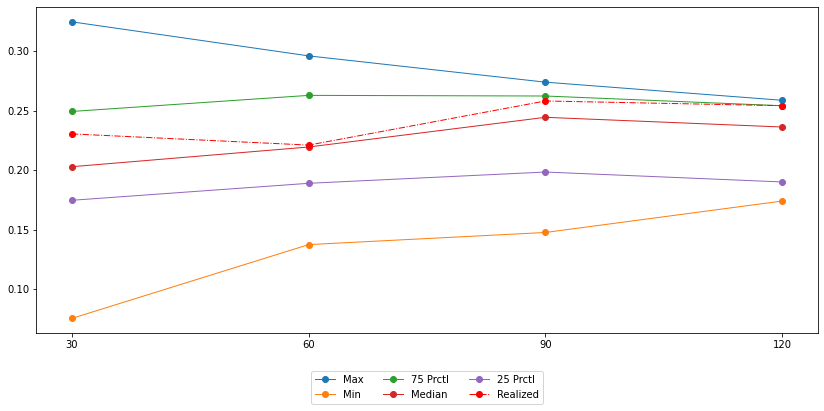

In [14]:
plt.figure(figsize=(14, 6))

plt.plot(windows, max_, '-o', linewidth=1, label='Max')
plt.plot(windows, min_, '-o', linewidth=1, label='Min')
plt.plot(windows, top_q, '-o', linewidth=1, label=f'{quantiles[1] * 100:.0f} Prctl')
plt.plot(windows, median, '-o', linewidth=1, label='Median')
plt.plot(windows, bottom_q, '-o', linewidth=1, label=f'{quantiles[0] * 100:.0f} Prctl')
plt.plot(windows, realized, 'ro-.', linewidth=1, label='Realized')

plt.xticks(windows)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

There are three conclusions you can draw from the chart:

Realized volatility:

1. Spikes (corresponds to a drop in the stock price)
2. Above the median and below 75 Prctl (might support a case to get short volatility)
3. Diverging from its mean (supports a case to get long volatility)